In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
from figure_utils import journal_figure, nanmad
import stats as my_stats

In [ ]:
model_list = ["alexnet_relu", "convnext", "convnext_ssl", "resnet18", "resnet18_robust", "resnet18_ssl", "resnet", "resnet_ssl", "resnet_swsl", "resnetSIN", "resnet152_2", "resnet101", "resnet101_ssl", "resnet_robust_eps1", "resnet_robust_eps3", "inception", "inceptionv1", "vit", "vit_ssl", "vgg16", "vgg16_robust", "densenet", "densenet169", "densenet161", "densenet161_robust", "densenet121", "mobilenet", "mobilenet_v2", "mobilenet_robust", "squeezenet", "cornetS_t0", "cornetS_reg", "cornetRT_t4", "nasnet", "pnasnet", "swin", "swin_ssl", "shufflenet", "shufflenet_robust"]


densenet161 54.62211477949083 10.741200057383097


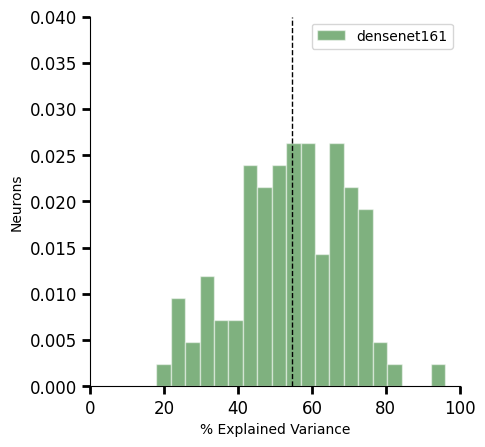

vgg16 53.00134295720707 10.215363347910817


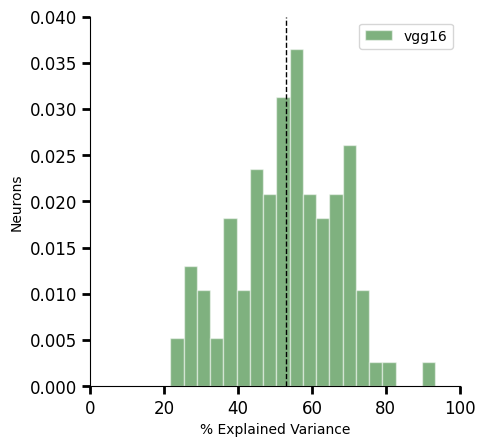

In [16]:
for model in ["densenet161", "vgg16"]:
    out_dir = f'./results_for_figures/model2monkey/{model}/'
    for monkey in ["m2"]:
        ev_per_neuron = np.load(os.path.join(out_dir, f'ev_{monkey}.npy'))
        
        plt.hist(np.array(ev_per_neuron).flatten(), bins=20, alpha=0.5, label=model, color="darkgreen", edgecolor='white', density=True)
        plt.axvline(np.mean(np.array(ev_per_neuron)), color='black', linestyle='--', linewidth=1)
        print(model, np.mean(np.array(ev_per_neuron)), nanmad(np.array(ev_per_neuron)))
        plt.xlabel("% Explained Variance")
        plt.ylabel("Neurons")
        plt.xlim(0, 100)
        plt.ylim(0, 0.04)
        journal_figure()
        plt.legend()
        plt.show()
    

In [14]:
ev_by_vgg16 = np.load(os.path.join("./results_for_figures/model2monkey/vgg16", f'ev_m2.npy'))
ev_by_densenet161 = np.load(os.path.join("./results_for_figures/model2monkey/densenet", f'ev_m2.npy'))
my_stats.print_unpaired_test(ev_by_vgg16, ev_by_densenet161)

t(212) = -0.607, p = 0.545


np.float64(0.5447804141664607)

In [3]:
weights_vgg16 = np.load("./weights_prediction/vgg16_to_m2_ridge_weights_avg.npy")
weights_densenet161 = np.load("./weights_prediction/densenet161_to_m2_ridge_weights_avg.npy")

weights_vgg16 = np.nanmean(np.abs(weights_vgg16), axis=0)
weights_densenet161 = np.nanmean(np.abs(weights_densenet161), axis=0)

norm_weights_vgg16 = weights_vgg16 / np.max(weights_vgg16)
norm_weights_densenet161 = weights_densenet161 / np.max(weights_densenet161)

In [4]:
# use grey cmap
from matplotlib import cm
cmap = cm.get_cmap('Greys')

/var/folders/h2/8tj3snsd0wj1qzvdlg5_17y00000gn/T/ipykernel_96247/2123163053.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Greys')


Median VGG16:  0.09165315 +/-  0.046630677


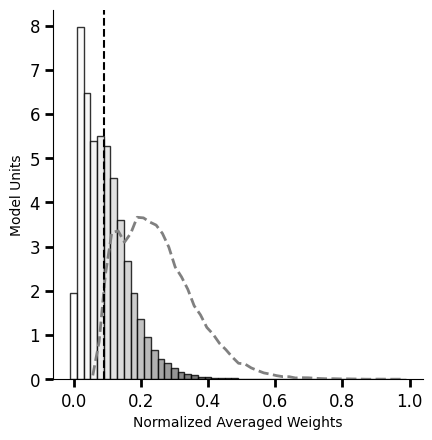

In [5]:
x = plt.hist(norm_weights_vgg16, bins=50, alpha=0.2, density=True, edgecolor='white')
x2 = plt.hist(norm_weights_densenet161, bins=50, alpha=0.2, density=True, edgecolor='white')
plt.close()
plt.plot(x2[1][:-1], x2[0], color='grey', linewidth=2, linestyle='--')
for i in range(len(x[0])):
    #plot bar with color from cmap
    plt.bar(x[1][i], x[0][i], width=x[1][1]-x[1][0], color=cmap(i*2/len(x[0])), edgecolor='black', alpha=0.8)
plt.axvline(np.median(norm_weights_vgg16), color="black", linestyle="--")
print("Median VGG16: ", np.median(norm_weights_vgg16), "+/- ", nanmad(norm_weights_vgg16))
plt.xlabel("Normalized Averaged Weights")
plt.ylabel("Model Units")
journal_figure()


Median DenseNet161:  0.24179876 +/-  0.075109616


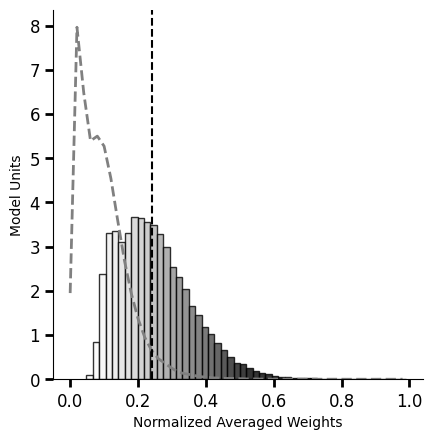

In [6]:
#same for pnasnet
x = plt.hist(norm_weights_vgg16, bins=50, alpha=0.2, density=True, edgecolor='white')
x2 = plt.hist(norm_weights_densenet161, bins=50, alpha=0.2, density=True, edgecolor='white')

plt.close()
plt.plot(x[1][:-1], x[0], color='grey', linewidth=2, linestyle='--')
for i in range(len(x2[0])):
    #plot bar with color from cmap
    plt.bar(x2[1][i], x2[0][i], width=x2[1][1]-x2[1][0], color=cmap(i*2/len(x2[0])), edgecolor='black', alpha=0.8)
plt.axvline(np.median(norm_weights_densenet161), color="black", linestyle="--")
print("Median DenseNet161: ", np.median(norm_weights_densenet161), "+/- ", nanmad(norm_weights_densenet161))
plt.xlabel("Normalized Averaged Weights")
plt.ylabel("Model Units")
journal_figure()


In [9]:
_ = my_stats.print_unpaired_test(norm_weights_densenet161, norm_weights_vgg16)

z = 252.105, p < 0.001


/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51744.
  res = hypotest_fun_out(*samples, **kwds)
/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 100352.
  res = hypotest_fun_out(*samples, **kwds)
